# Solución Laboratorio Aprendizaje No Supervizado

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import pairwise_distances,silhouette_score
import numpy as np
from sklearn_extra.cluster import KMedoids

In [53]:
dataset = sm.datasets.get_rdataset("USArrests", "datasets")

In [54]:
df_usa_arrests=dataset.data

### 1.Realice una pequeña descripción estadística de las variables. ¿se justifica o no una estandarizacion de las variables cuantitativas?.

## Anáslisis Descriptivo

In [4]:
df_usa_arrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df_usa_arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:

df_usa_arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df_usa_arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
df_usa_arrests.shape

(50, 4)

In [9]:
df_usa_arrests.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
df_usa_arrests.duplicated().sum()

0

In [11]:
df_usa_arrests.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Análisis Multivariado

c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

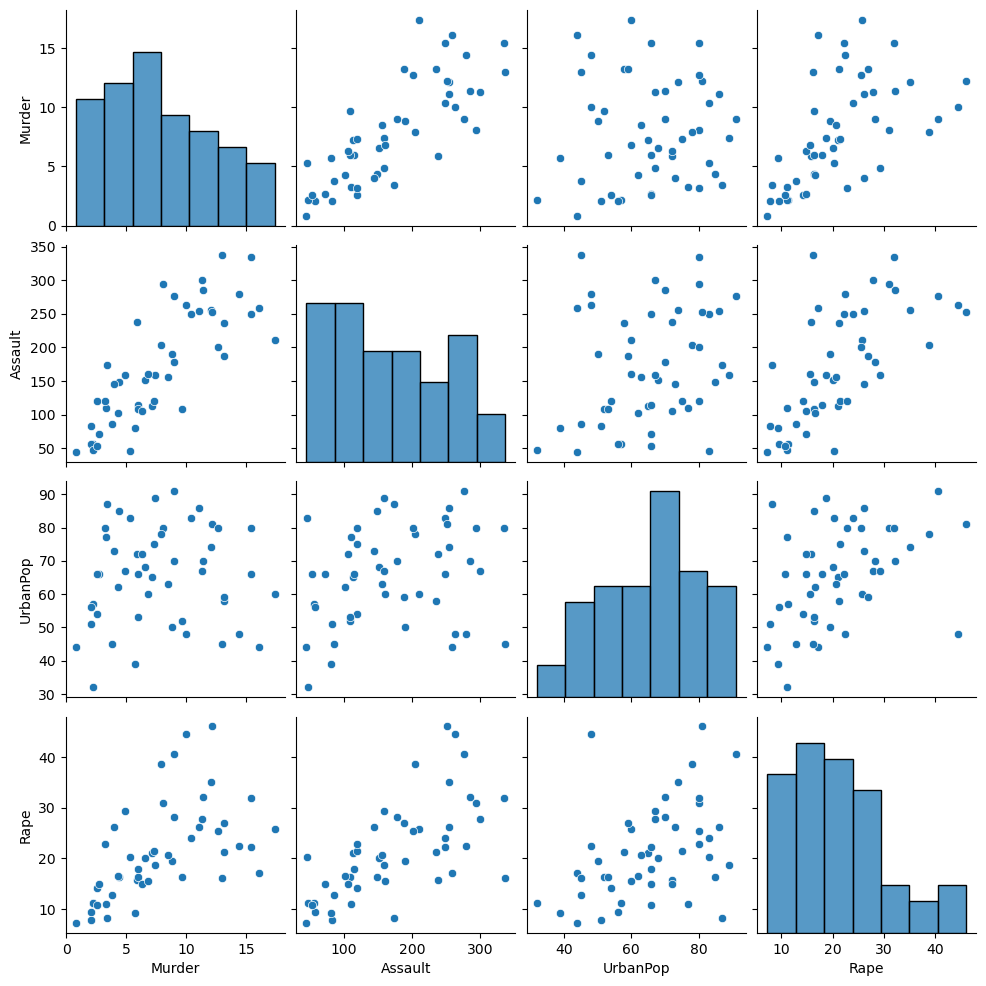

In [12]:
sns.pairplot(df_usa_arrests)
plt.show()

<Axes: >

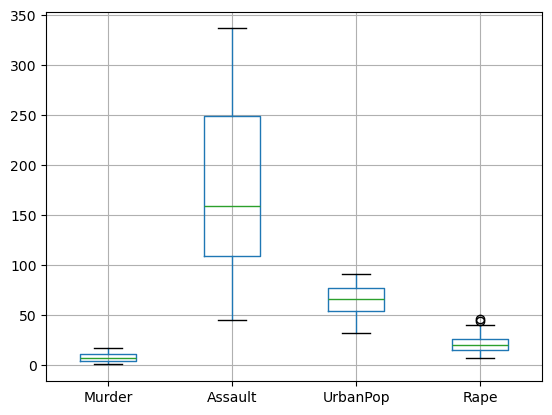

In [13]:
df_usa_arrests.boxplot()

Ahora escalamos los datos

In [14]:

df_usa_arrests_scaled=pd.DataFrame(scale(df_usa_arrests),columns=df_usa_arrests.columns)

<Axes: >

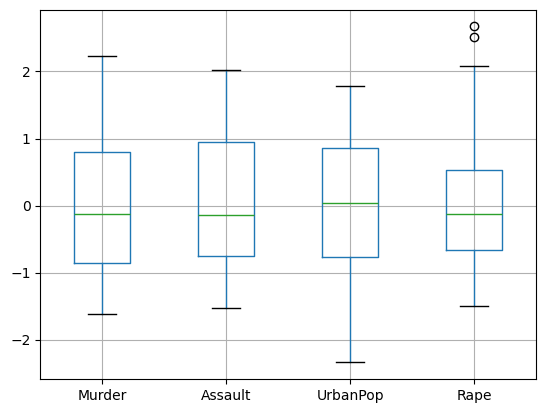

In [15]:
df_usa_arrests_scaled.boxplot()

Coeficiente de Variación (CV)
El Coeficiente de Variación (CV) se calcula como la relación entre la desviación estándar y la media de cada variable. Si el CV es mayor a 0.5, se recomienda estandarizar la variable para garantizar que cada una tenga una varianza similar, mejorando así la calidad del modelo estadístico.

In [43]:
# Descripción estadística
desc_stats = df_usa_arrests.describe()
print(desc_stats)

# Análisis de la necesidad de estandarización
# Coeficiente de variación (CV) para cada variable
cv = df_usa_arrests.std() / df_usa_arrests.mean()
print("\nCoeficiente de Variación (CV):")
print(cv)

# Justificación de la estandarización
# Se considera estandarizar si el CV es mayor a 0.5
estandarizar = cv > 0.5
print("\n¿Se justifica la estandarización?:")
print(estandarizar)

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

Coeficiente de Variación (CV):
Murder      0.559259
Assault     0.488040
UrbanPop    0.220854
Rape        0.441145
dtype: float64

¿Se justifica la estandarización?:
Murder       True
Assault     False
UrbanPop    False
Rape        False
dtype: bool


### 2.A. Agrupar los observaciones mediante enlace simple, completo y ward, junto con las métricas Euclidiana y Manhattan. Visualice los agrupamiento mediante sus respectivos dendrograma.

Enlace simple con distancia Euclidiana

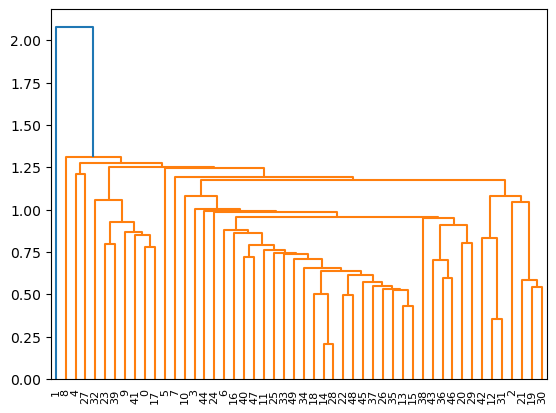

In [45]:
linkage_matrix = linkage(df_usa_arrests_scaled, method='single',metric='euclidean')
dendrogram(linkage_matrix)
plt.show()


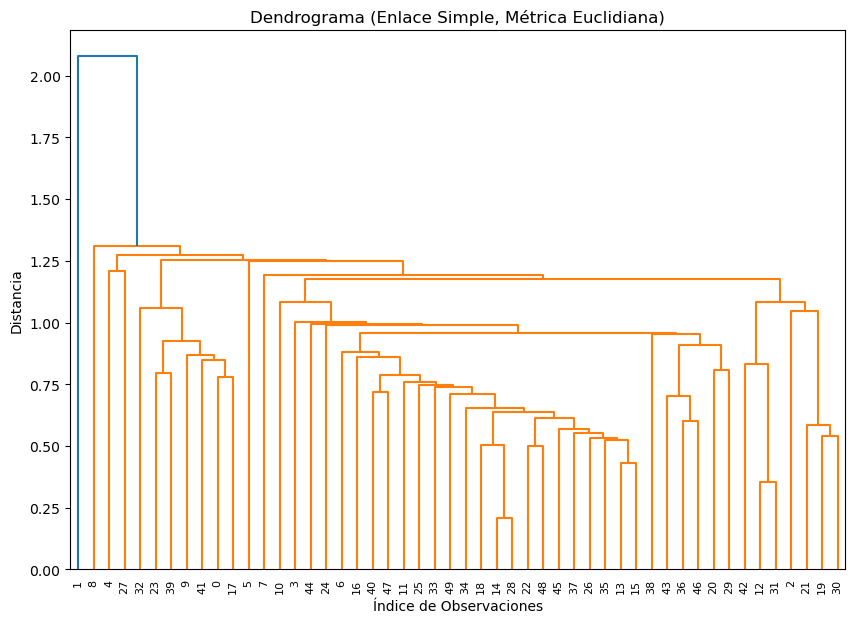

In [46]:
linkage_matrix = linkage(df_usa_arrests_scaled, method='single', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Simple, Métrica Euclidiana)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


Enlace simple con distancia Manhattan

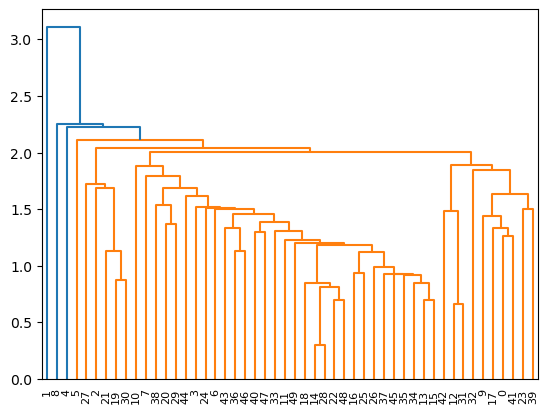

In [17]:
linkage_matrix = linkage(df_usa_arrests_scaled, method="single",metric="cityblock")
dendrogram(linkage_matrix)
plt.show()

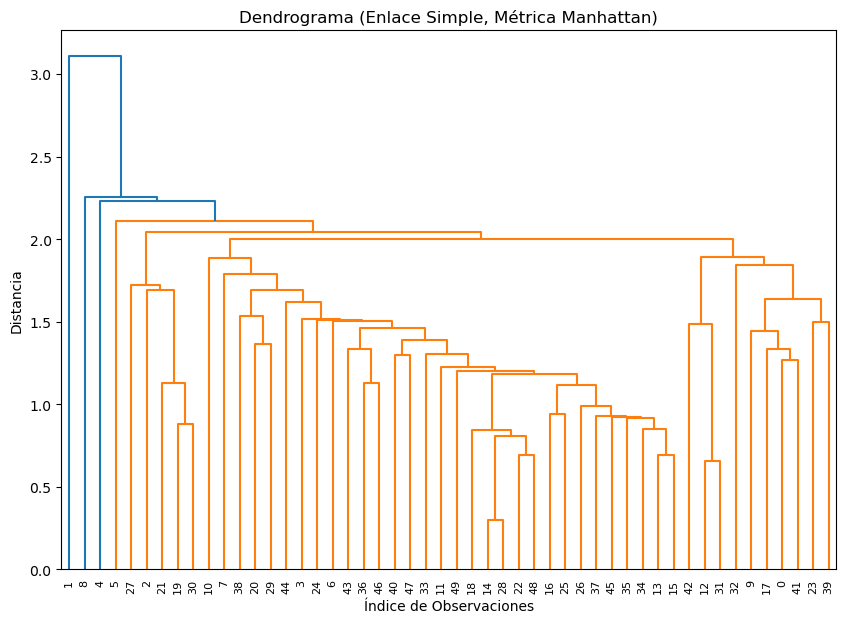

In [47]:
# Enlace Simple con Métrica Manhattan
linkage_matrix = linkage(df_usa_arrests_scaled, method="single", metric="cityblock")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Simple, Métrica Manhattan)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


Enlace completo con distancia Euclidiana

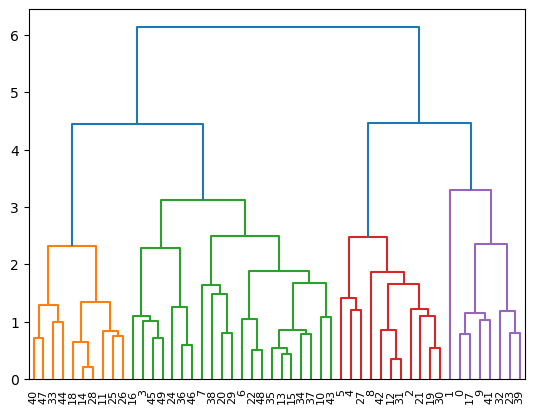

In [18]:
linkage_matrix = linkage(df_usa_arrests_scaled, method="complete",metric="euclidean")
dendrogram(linkage_matrix)
plt.show()

Enlace completo con distancia Manhattan

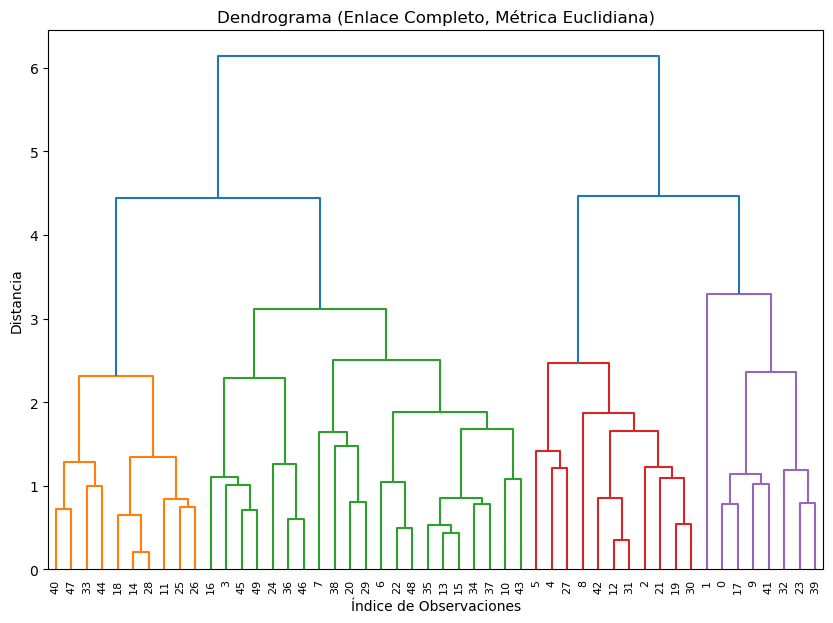

In [48]:
# Enlace Completo con Métrica Euclidiana
linkage_matrix = linkage(df_usa_arrests_scaled, method="complete", metric="euclidean")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Completo, Métrica Euclidiana)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


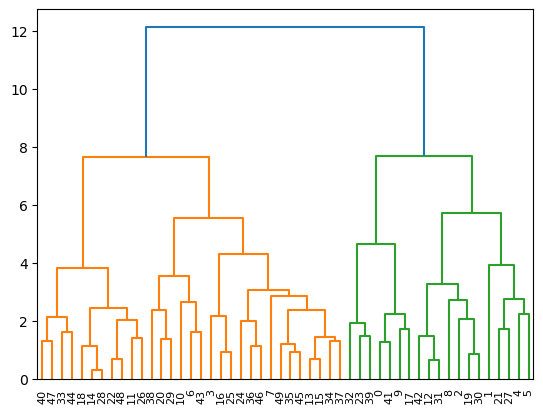

In [19]:
linkage_matrix = linkage(df_usa_arrests_scaled, method="complete", metric="cityblock")
dendrogram(linkage_matrix)
plt.show()

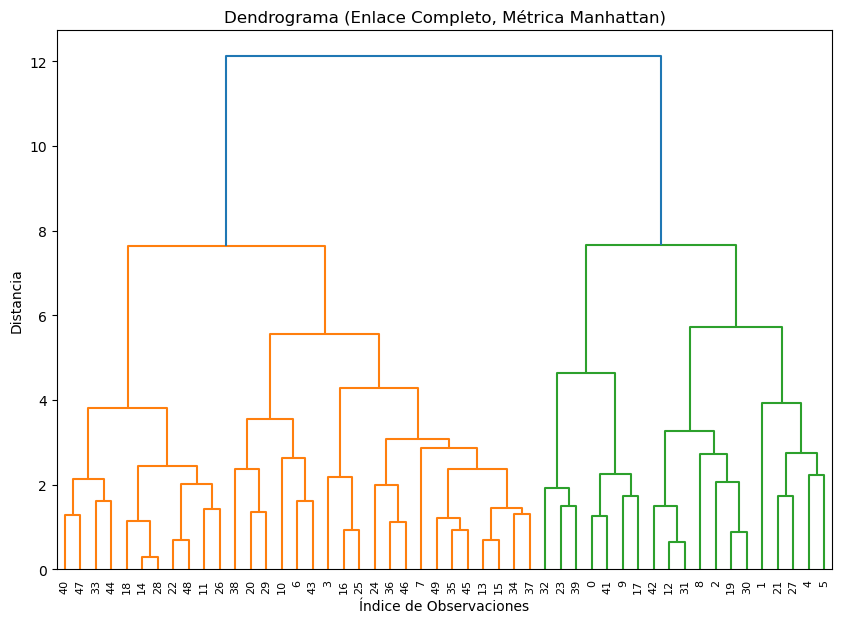

In [49]:
#Métrica Manhattan
linkage_matrix = linkage(df_usa_arrests_scaled, method="complete", metric="cityblock")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Completo, Métrica Manhattan)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


Enlace Ward con distancia Euclidiana

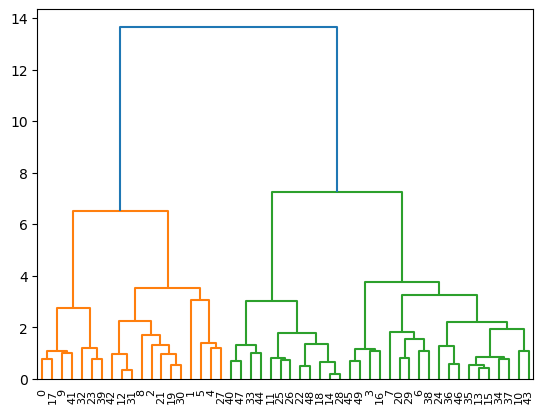

In [20]:
linkage_matrix = linkage(df_usa_arrests_scaled, method="ward",metric="euclidean")
dendrogram(linkage_matrix)
plt.show()

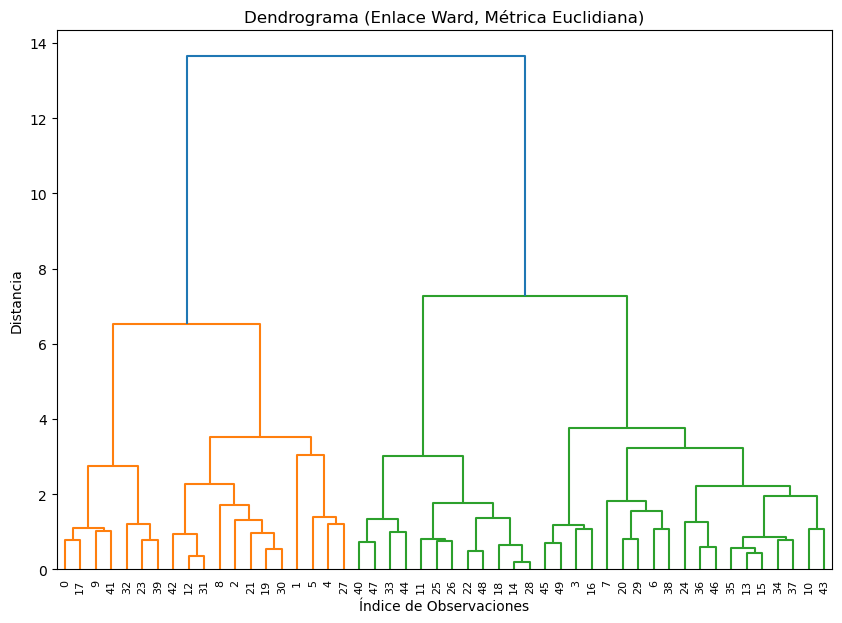

In [50]:
# Enlace Ward con Métrica Euclidiana
linkage_matrix = linkage(df_usa_arrests_scaled, method="ward", metric="euclidean")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Ward, Métrica Euclidiana)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


### 2.B. Escoja uno de los métodos aglomerativos (métrica y enlace), con este, crear los 3 grupos y comparar los clúster obtenidos, en términos de promedio y desviación estándar.

Usaremos el enlace ward con la métrica euclideana

In [21]:
model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")

labels = model.fit_predict(df_usa_arrests_scaled)
print(f'Etiquetas: {labels}')

print('Cluster 01: ',df_usa_arrests_scaled[labels == 0])
print('Cluster 02: ',df_usa_arrests_scaled[labels == 1])
print('Cluster 03: ',df_usa_arrests_scaled[labels == 2])

Etiquetas: [0 0 0 1 0 0 1 1 0 0 1 2 0 1 2 1 1 0 2 0 1 0 2 0 1 2 2 0 2 1 0 0 0 2 1 1 1
 1 1 0 2 0 0 1 2 1 1 2 2 1]
Cluster 01:        Murder   Assault  UrbanPop      Rape
0   1.255179  0.790787 -0.526195 -0.003451
1   0.513019  1.118060 -1.224067  2.509424
2   0.072361  1.493817  1.009122  1.053466
4   0.281093  1.275635  1.776781  2.088814
5   0.025976  0.402909  0.869548  1.883901
8   1.765415  1.990786  1.009122  1.150530
9   2.229265  0.487757 -0.386621  0.492653
12  0.605789  0.948363  1.218484  0.298525
17  1.765415  0.948363  0.032102  0.104398
19  0.814521  1.566544  0.101889  0.708350
21  1.000062  1.021090  0.590399  1.495646
23  1.927762  1.069575 -1.503215 -0.445631
27  1.023254  0.984726  1.078909  2.671197
30  0.837714  1.384726  0.311251  1.172100
31  0.768136  1.008969  1.427845  0.525008
32  1.208794  2.015028 -1.433428 -0.553480
39  1.533490  1.311999 -1.224067  0.136752
41  1.255179  0.208970 -0.456408  0.611287
42  1.139217  0.366545  1.009122  0.460298
Cluster 02:  

In [22]:
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [23]:
def compare_promedios_std(df):
    clusters_index = df["cluster"].unique()
    for i in clusters_index:
        print(f'CLUSTER {i+1}')
        print('----')
        print('Promedio: ')
        print(df[df["cluster"] == i].mean())
        print('Desviación Estándar: ')
        print(df[df["cluster"] == i].std())

In [24]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 1
----
Promedio: 
Murder      1.053771
Assault     1.073403
UrbanPop    0.193714
Rape        0.861041
cluster     0.000000
dtype: float64
Desviación Estándar: 
Murder      0.614641
Assault     0.500570
UrbanPop    1.036692
Rape        0.928914
cluster     0.000000
dtype: float64
CLUSTER 2
----
Promedio: 
Murder     -0.365856
Assault    -0.347968
UrbanPop    0.399403
Rape       -0.220851
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.464745
Assault     0.497125
UrbanPop    0.759453
Rape        0.570458
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder     -1.089198
Assault    -1.148605
UrbanPop   -0.939102
Rape       -1.013634
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.361124
Assault     0.304152
UrbanPop    0.735228
Rape        0.339504
cluster     0.000000
dtype: float64


### 2.C. Realice un agrupamiento considerando 3 grupos utilizando la tecnica K-medias. Comparar los cluster obtenidos, en terminos de promedio y desviacion estandar

In [25]:
model = KMeans(n_clusters=3)
model.fit(df_usa_arrests_scaled)
labels = model.predict(df_usa_arrests_scaled)


c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [27]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 3
----
Promedio: 
Murder      1.015137
Assault     1.024120
UrbanPop    0.199591
Rape        0.855564
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.622697
Assault     0.534750
UrbanPop    1.009384
Rape        0.904470
cluster     0.000000
dtype: float64
CLUSTER 2
----
Promedio: 
Murder     -0.885159
Assault    -1.021332
UrbanPop   -0.949903
Rape       -0.920165
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.617276
Assault     0.469061
UrbanPop    0.677422
Rape        0.398199
cluster     0.000000
dtype: float64
CLUSTER 1
----
Promedio: 
Murder     -0.494407
Assault    -0.386484
UrbanPop    0.581676
Rape       -0.264310
cluster     0.000000
dtype: float64
Desviación Estándar: 
Murder      0.382029
Assault     0.499101
UrbanPop    0.623610
Rape        0.564743
cluster     0.000000
dtype: float64


### 3. Utilice las tecnicas del codo, de Hartigan y Silhuette para seleccionar la cantidad optima de grupos utilizando algun metodo de agrupamiento jerarquico (deben fijar una metrica y un tipo de enlace). En caso que los algoritmos entreguen diferentes valores de K seleccionar una metodologıa e interpretar los grupos obtenidos.

In [28]:
def obtener_within_cluster(observaciones, labels):
    distancias_totales_cluster = []
    for index_cluster in range(0, max(labels) + 1):
        distancias_por_cluster = pairwise_distances(
            X=observaciones[labels == index_cluster], metric="euclidean"
        )
        distancias_totales_cluster.append(distancias_por_cluster.sum())
    return sum(distancias_totales_cluster)

Usaremos el tipo de enlace ward con una métrica euclidiana

Técnica del codo

Text(0, 0.5, 'Porcentaje Within-Cluster')

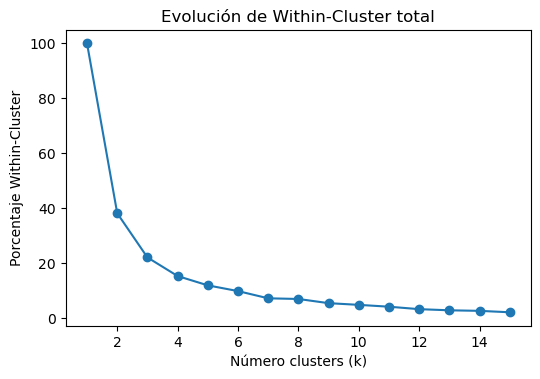

In [29]:
k_max =15
within_cluster_list = []
range_ks = range(1, k_max + 1)
for k in range_ks:
    model = AgglomerativeClustering(
        n_clusters=k, metric="euclidean", linkage="ward"
    )
    labels = model.fit_predict(df_usa_arrests_scaled)
    within_cluster_list.append(obtener_within_cluster(df_usa_arrests_scaled, labels))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_ks, within_cluster_list / within_cluster_list[0] * 100, marker="o")
ax.set_title("Evolución de Within-Cluster total")
ax.set_xlabel("Número clusters (k)")
ax.set_ylabel("Porcentaje Within-Cluster")

Técnica de Hartigan

[0.03244594 0.01491121 0.00926043 0.00608724 0.00464517 0.00818721
 0.00079675 0.00659591 0.00309636 0.00402638 0.00700807 0.00384677
 0.0020617 ]


Text(0, 0.5, 'H')

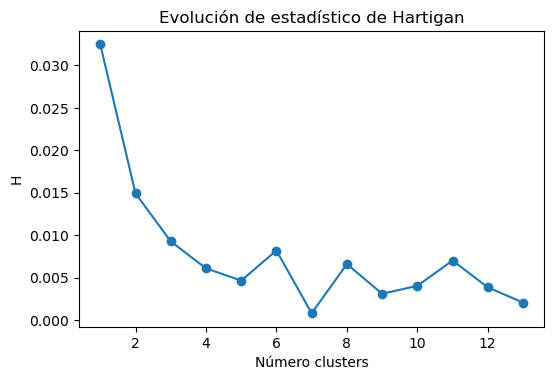

In [30]:
k=np.arange(15)
# Método Hartigan
wc_array = np.array(within_cluster_list)
H = (wc_array[0:13] / wc_array[1:14] - 1) / (len(df_usa_arrests_scaled) - k[0:13])
print(H)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range(1, 14), H, marker="o")
ax.set_title("Evolución de estadístico de Hartigan")
ax.set_xlabel("Número clusters")
ax.set_ylabel("H")

Técnica de Silhuette

Text(0, 0.5, 'Media índices silhouette')

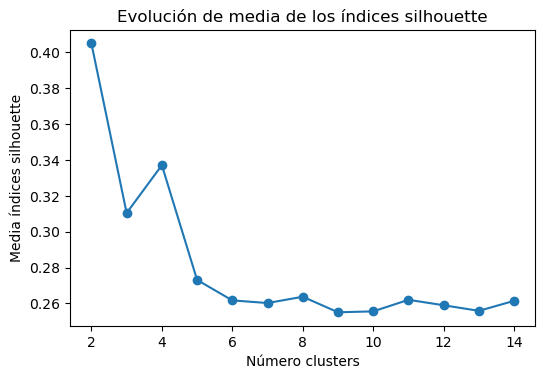

In [31]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for k in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=k, metric="euclidean", linkage="ward")
    labels = model.fit_predict(df_usa_arrests_scaled)
    silhouette_avg = silhouette_score(df_usa_arrests_scaled, labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker="o")
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Media índices silhouette")

### 4. Utilice las tecnicas del codo, de Hartigan y Silhuette para seleccionar la cantidad  ́optima de grupos utilizando el algoritmo K-medias. En caso que los algoritmos entreguen diferentes valores de K, seleccionar una metodologia e interpretar los grupos obtenidos.

Técnica del codo

c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Porcentaje Within-Cluster')

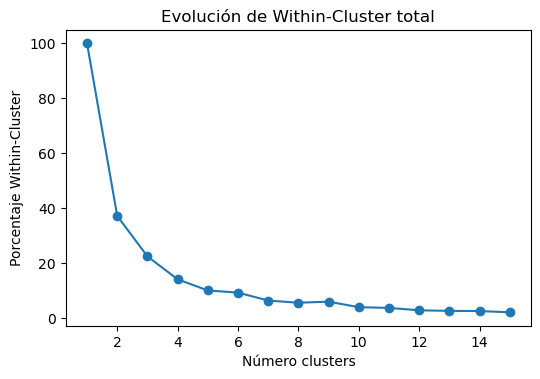

In [32]:
k_max = 15
within_cluster_list = []

for k in range(1, k_max + 1):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(df_usa_arrests_scaled)
    within_cluster_list.append(obtener_within_cluster(df_usa_arrests_scaled, labels))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(
    range(1, k_max + 1), within_cluster_list / within_cluster_list[0] * 100, marker="o"
)
ax.set_title("Evolución de Within-Cluster total")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Porcentaje Within-Cluster")

Técnica de Hartigan

[ 0.0336983   0.01331835  0.01223132  0.00853913  0.00181241  0.00991876
  0.00320112 -0.00149988  0.01185171  0.00159769  0.00758282  0.0018373
  0.00082476]


Text(0, 0.5, 'H')

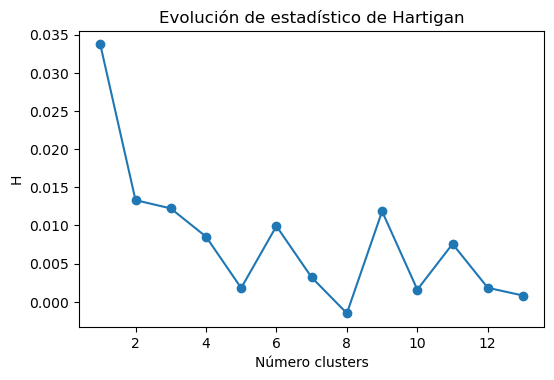

In [33]:
k = np.arange(15)
wc_array = np.array(within_cluster_list)
H = (wc_array[0:13] / wc_array[1:14] - 1) / (len(df_usa_arrests_scaled) - k[0:13])
print(H)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range(1, 14), H, marker="o")
ax.set_title("Evolución de estadístico de Hartigan")
ax.set_xlabel("Número clusters")
ax.set_ylabel("H")

Técnica de Silhuette

c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Media índices silhouette')

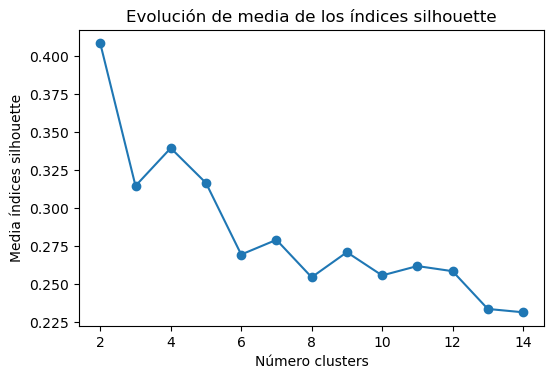

In [34]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for k in range_n_clusters:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(df_usa_arrests_scaled)
    silhouette_avg = silhouette_score(df_usa_arrests_scaled, labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker="o")
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Media índices silhouette")

### 5. Buscar o implementar la tecnica de agrupamiento K-medois (PAM) y el metodo del Gap-Statistic para seleccionar la cantidad de grupos

K-medoides es un método de agrupamiento similar a K-means, pero en lugar de usar la media de los puntos en un grupo para definir su centro (centroide), usa un punto real del grupo llamado "medoide". Esto hace que K-medoides sea más robusto a los valores atípicos.

Gap Statistic:El Gap Statistic es una técnica para determinar el número óptimo de grupos (k) en un conjunto de datos
Gap Máximo: El número de grupos óptimo es el valor de k que maximiza el Gap. Este valor sugiere que hay una clara separación entre los grupos en los datos.
Evaluación de 
Estabilidad: Si el Gap no varía significativamente para diferentes valores de k, puede indicar que los datos no tienen una estructura de grupo fuerte.

Usaremos esta función para generar las muestras aleatorias

In [35]:
def generate_samples(limites,n):
    n_features = len(limites[0])
    samples = np.zeros((n, n_features))
    for i in range(n_features):
        samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
    return samples

c:\Users\marco\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
c:\Users\marco\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Número de clusters: 1
Número de clusters: 2
 GAPS COMPARACIÓN: 0.14988461922274965>=0.42549962480920056
Número de clusters: 3
 GAPS COMPARACIÓN: 0.46562601587464325>=0.512999795722017
Número de clusters: 4
 GAPS COMPARACIÓN: 0.5576635159353129>=0.6472200296648255
Número de clusters: 5
 GAPS COMPARACIÓN: 0.6910539395080182>=0.7301735170925296
Número de clusters: 6
 GAPS COMPARACIÓN: 0.7695172481813533>=0.7761829726762608
Número de clusters: 7
 GAPS COMPARACIÓN: 0.8233244171369343>=0.8137330401763382
 Cluster óptimo:  6


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

Número de clusters: 8
 GAPS COMPARACIÓN: 0.8521092821188763>=0.8837109889804979
Número de clusters: 9
 GAPS COMPARACIÓN: 0.9238222770195401>=0.8946229287855156
 Cluster óptimo:  8
Número de clusters: 10
 GAPS COMPARACIÓN: 0.9283857479956552>=0.9068401038123268
 Cluster óptimo:  9
Número de clusters: 11
 GAPS COMPARACIÓN: 0.9494674799096252>=0.9441735872578193
 Cluster óptimo:  10


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

Número de clusters: 12
 GAPS COMPARACIÓN: 1.0010580582876827>=0.9271651537915511
 Cluster óptimo:  11
Número de clusters: 13
 GAPS COMPARACIÓN: 0.9729998555707366>=1.0000134973491746
Número de clusters: 14
 GAPS COMPARACIÓN: 1.0463875484920129>=1.0588601302736471
Número de clusters: 15
 GAPS COMPARACIÓN: 1.1089581105372535>=1.0099523938766803
 Cluster óptimo:  14


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

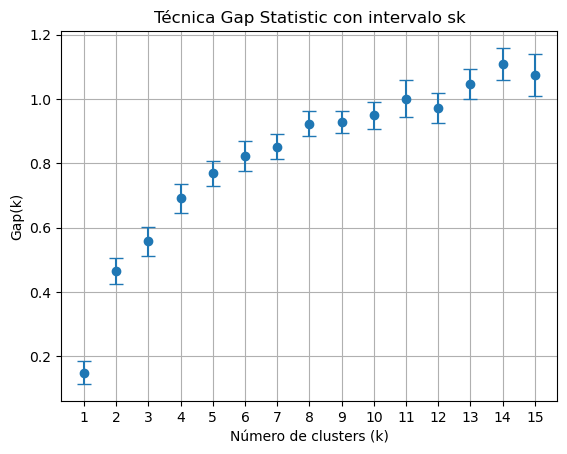

In [36]:
m_conjuntos=15
k_max=15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k=[]
gaps=[]
sks=[]
range_ks=range(1,k_max+1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="manhattan").fit(df_usa_arrests_scaled)
    labels = model.labels_
    wc_samples=[]
    for i in range(m_conjuntos):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="manhattan").fit(samples)
        labels_sample = model_sample.labels_
        within_cluster_sample=obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original=obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio=np.log(wc_samples).mean()
    gap_k=l_medio-np.log(within_cluster_original)
    sdk_cuadrado=((np.log(wc_samples)-l_medio)**2).mean()
    sk=np.sqrt(1+1/m_conjuntos)*np.sqrt(sdk_cuadrado)
    wc_por_k.append(within_cluster_original)
    gaps.append(gap_k)
    sks.append(sk)
    print(f'Número de clusters: {k}')
    if k>1:
        print(f' GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}')
        if gaps[k-2]>=gap_k-sk:
            print(' Cluster óptimo: ',k-1)
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Técnica Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

Según la gráfica el k menor que cumple la condición es k=6

### 6. Utilizar el método Gap-Statistic para escoger la cantidad apropiada de Clúster cuando se aplica la técnica de agrupamiento K-medois (PAM). Utilice al menos dos metricas de disimilaridad diferentes. En caso que los métodos anteriores den resultados diferentes escoger uno y luego describir los grupos (promedio y desviación estándar de cada variable de cada grupo) seleccionados mediante PAM

Métrica Euclidiana

Número de cluster: 1
Número de cluster: 2
 GAPS COMPARACIÓN: 0.15801035157641863>=0.412250948484945
Número de cluster: 3
 GAPS COMPARACIÓN: 0.4603555546136606>=0.535837706786813


c:\Users\marco\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
c:\Users\marco\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Número de cluster: 4
 GAPS COMPARACIÓN: 0.5648719481645195>=0.6856774278999711
Número de cluster: 5
 GAPS COMPARACIÓN: 0.7213210240750305>=0.7196834169443491
Número de clusters óptimo: 4
Número de cluster: 6
 GAPS COMPARACIÓN: 0.7710398961593681>=0.8084659672903088
Número de cluster: 7
 GAPS COMPARACIÓN: 0.8396273430693553>=0.7822831997283016
Número de clusters óptimo: 6
Número de cluster: 8
 GAPS COMPARACIÓN: 0.830639408964994>=0.8571950321600047


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

Número de cluster: 9
 GAPS COMPARACIÓN: 0.8880476112706317>=0.919541294007051
Número de cluster: 10
 GAPS COMPARACIÓN: 0.9463517831336556>=0.915992646311767
Número de clusters óptimo: 9
Número de cluster: 11
 GAPS COMPARACIÓN: 0.9549854812142939>=0.9295574602092861
Número de clusters óptimo: 10
Número de cluster: 12
 GAPS COMPARACIÓN: 0.9800035251058841>=1.0200128333626186


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

Número de cluster: 13
 GAPS COMPARACIÓN: 1.05650363092703>=1.0076984660706951
Número de clusters óptimo: 12
Número de cluster: 14
 GAPS COMPARACIÓN: 1.0580086536982725>=1.0668839737046079
Número de cluster: 15
 GAPS COMPARACIÓN: 1.104947793589056>=1.1055693470282104


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

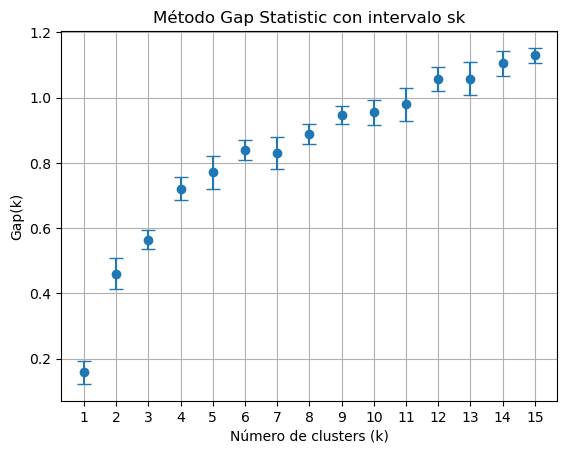

In [37]:
m_conjuntos = 15
k_max = 15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k = []
gaps = []
sks = []
range_ks = range(1, k_max + 1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="euclidean").fit(
        df_usa_arrests_scaled
    )
    labels = model.labels_
    wc_samples = []
    for i in range(m_conjuntos):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="euclidean").fit(
            samples
        )
        labels_sample = model_sample.labels_
        within_cluster_sample = obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original = obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio = np.log(wc_samples).mean()
    gap_k = l_medio - np.log(within_cluster_original)
    sdk_cuadrado = ((np.log(wc_samples) - l_medio) ** 2).mean()
    sk = np.sqrt(1 + 1 / m_conjuntos) * np.sqrt(sdk_cuadrado)
    gaps.append(gap_k)
    sks.append(sk)
    wc_por_k.append(within_cluster_original)
    print(f"Número de cluster: {k}")
    if k > 1:
        print(f" GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}")
        if gaps[k - 2] >= gap_k - sk:
            print(f"Número de clusters óptimo: {k-1}")
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Método Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

Métrica chebyshev

La métrica de Chebyshev, también conocida como distancia de Chebyshev o distancia máxima, es una métrica que define la distancia entre dos puntos en un espacio vectorial. Es particularmente útil en situaciones donde solo importa la mayor diferencia en una sola dimensión. La distancia de Chebyshev entre dos puntos es cuántos "pasos" necesitas tomar, si te permites el lujo de moverte en cualquier dirección hasta llegar al punto más lejano.

Número de clusters: 1


c:\Users\marco\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
c:\Users\marco\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Número de clusters: 2
 GAPS COMPARACIÓN: 0.16315135581393925>=0.423735020504969
Número de clusters: 3
 GAPS COMPARACIÓN: 0.46426087828841744>=0.5314660850715174
Número de clusters: 4
 GAPS COMPARACIÓN: 0.568078721485537>=0.6470517850234998
Número de clusters: 5
 GAPS COMPARACIÓN: 0.6907773418602945>=0.7276590348537829
Número de clusters: 6
 GAPS COMPARACIÓN: 0.7590539935264831>=0.7979823932084188
Número de clusters: 7
 GAPS COMPARACIÓN: 0.8291447346844372>=0.8161129548732982
Número de clusters óptimo: 6


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

Número de clusters: 8
 GAPS COMPARACIÓN: 0.851900087346948>=0.8514508663493822
Número de clusters óptimo: 7
Número de clusters: 9
 GAPS COMPARACIÓN: 0.897890305850404>=0.8652733982060975
Número de clusters óptimo: 8
Número de clusters: 10
 GAPS COMPARACIÓN: 0.9088281214346781>=0.9470847156427269
Número de clusters: 11
 GAPS COMPARACIÓN: 0.9740657023295212>=0.9744292354021236


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

Número de clusters: 12
 GAPS COMPARACIÓN: 1.0075516102452688>=0.9836049785436309
Número de clusters óptimo: 11
Número de clusters: 13
 GAPS COMPARACIÓN: 1.03529392949571>=1.04626713133105
Número de clusters: 14
 GAPS COMPARACIÓN: 1.0806008538390879>=1.0307237960815059
Número de clusters óptimo: 13


C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
C:\Users\marco\AppData\Local\Temp\ipykernel_23648\653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

Número de clusters: 15
 GAPS COMPARACIÓN: 1.0736735161517137>=1.0925046529924767


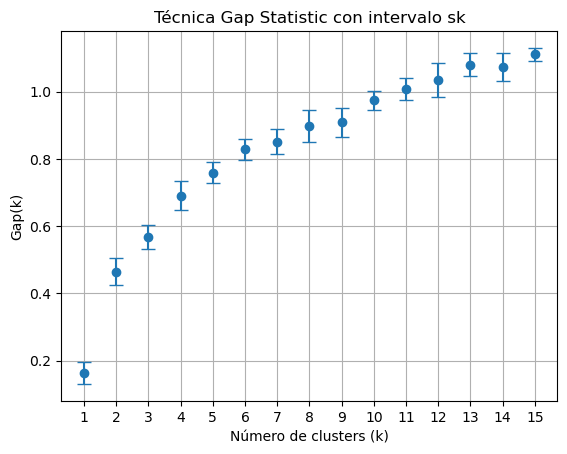

In [38]:
m_samples = 15
k_max = 15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k = []
gaps = []
sks = []
range_ks=range(1,k_max+1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="chebyshev").fit(
        df_usa_arrests_scaled
    )
    labels = model.labels_
    wc_samples = []
    for i in range(m_samples):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="chebyshev").fit(
            samples
        )
        labels_sample = model_sample.labels_
        within_cluster_sample = obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original = obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio = np.log(wc_samples).mean()
    gap_k = l_medio - np.log(within_cluster_original)
    gaps.append(gap_k)
    sdk_cuadrado = ((np.log(wc_samples) - l_medio) ** 2).mean()
    sk = np.sqrt(1 + 1 / m_samples) * np.sqrt(sdk_cuadrado)
    sks.append(sk)
    wc_por_k.append(within_cluster_original)
    print(f"Número de clusters: {k}")
    if k > 1:
        print(f" GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}")
        if gaps[k-2]>=gap_k-sk:
            print(f'Número de clusters óptimo: {k-1}')
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Técnica Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

En estos casos la primera métrica me dió como número óptimo de clusters k=6 y la segunda k=5, para continuar el análisis iremos por la primera métrica que nos dio k=6

In [39]:
model = KMedoids(n_clusters=6, method="pam", metric="euclidean").fit(
        df_usa_arrests_scaled
    )
labels = model.labels_
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [40]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 2
----
Promedio: 
Murder      1.426224
Assault     0.883211
UrbanPop   -0.822791
Rape        0.019467
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.603380
Assault     0.603072
UrbanPop    0.561714
Rape        0.411057
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder      0.782632
Assault     1.218059
UrbanPop    0.564229
Rape        1.709995
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.530747
Assault     0.465580
UrbanPop    0.886628
Rape        0.695733
cluster     0.000000
dtype: float64
CLUSTER 5
----
Promedio: 
Murder      0.573319
Assault     0.781090
UrbanPop    0.995165
Rape        0.617757
cluster     4.000000
dtype: float64
Desviación Estándar: 
Murder      0.417014
Assault     0.556877
UrbanPop    0.419884
Rape        0.292845
cluster     0.000000
dtype: float64
CLUSTER 6
----
Promedio: 
Murder     -0.716185
Assault    -0.345143
UrbanPop    1.138727
Rape       -0.542695
cluster     5.000000
dtype